In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU
from keras import models
from keras import layers

import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image
from sklearn.preprocessing import StandardScaler
from keras.preprocessing import image
from keras.layers import SimpleRNN
from keras.layers import LSTM

In [2]:
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [3]:
Full_Path = Path("flowers/flowers/")
JPG_Path = list(Full_Path.glob(r"*/*.jpg"))
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))

JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)
JPG_Labels_Series = pd.Series(JPG_Labels,name="CATEGORY")

In [4]:
data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)
data = data.sample(frac=1).reset_index(drop=True)

In [5]:
data

,JPG,CATEGORY
0,flowers/flowers/sunflower/9111896677_ff0b6fa6f...,sunflower
1,flowers/flowers/rose/7461896668_cfef58f894_n.jpg,rose
2,flowers/flowers/daisy/33858238653_6549e21f53_n...,daisy
3,flowers/flowers/sunflower/2733109082_1351f6738...,sunflower
4,flowers/flowers/daisy/7630517248_98fb8bee1f_n.jpg,daisy
...,...,...
3266,flowers/flowers/rose/5001855107_71351ce785_n.jpg,rose
3267,flowers/flowers/rose/5001843267_ccc0aa7d4d_n.jpg,rose
3268,flowers/flowers/sunflower/19710076021_f5bb1625...,sunflower
3269,flowers/flowers/rose/17165596357_392a12391f.jpg,rose


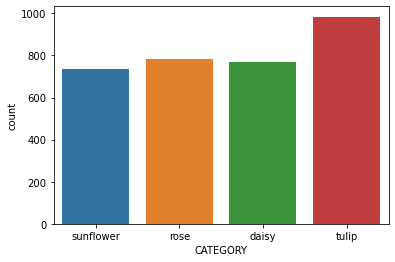

In [6]:
sns.countplot(data["CATEGORY"])
plt.show()

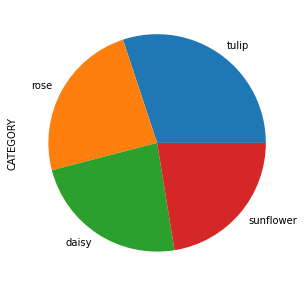

In [7]:
data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

Text(0.5, 1.0, 'rose')

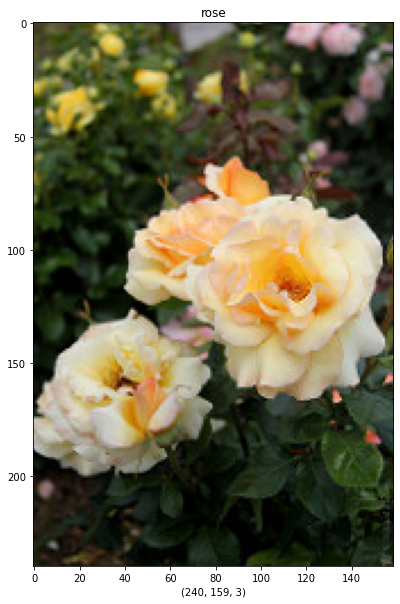

In [8]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(data["JPG"][1])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(data["CATEGORY"][1])

# Train, test, split

In [9]:
train_data, test_data = train_test_split(data, train_size=0.8, random_state=89, shuffle=True)

In [10]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    zoom_range=0.2,
                                    rotation_range=40,
                                    shear_range=0.2,
                                    channel_shift_range=0.2,
                                    fill_mode="nearest",
                                    horizontal_flip=True)

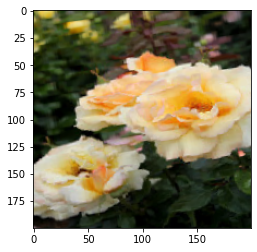

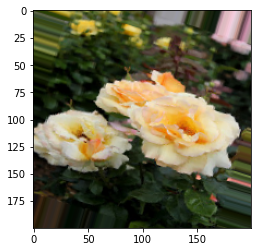

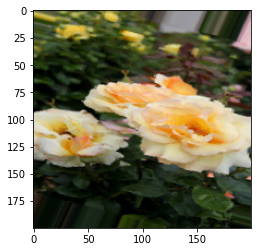

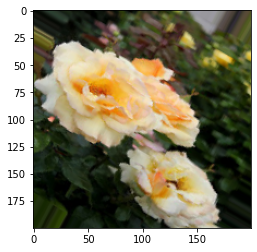

In [11]:
example_IMG = data["JPG"][1]
Load_IMG = image.load_img(example_IMG,target_size=(200,200))
Array_IMG = image.img_to_array(Load_IMG)
Array_IMG = Array_IMG.reshape((1,) + Array_IMG.shape)

i = 0
for batch in Train_Generator.flow(Array_IMG,batch_size=1):
    plt.figure(i)
    plot_IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [12]:
Test_Generator = ImageDataGenerator(rescale=1./255)

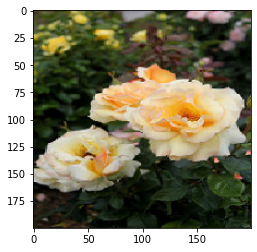

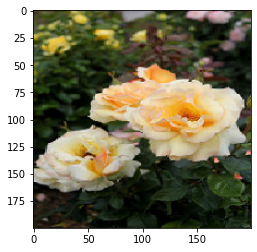

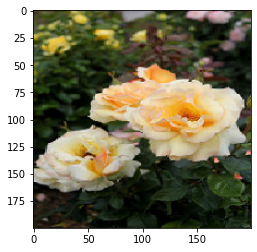

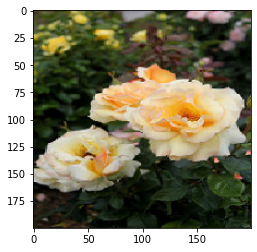

In [13]:
example_IMG = data["JPG"][1]
Load_IMG = image.load_img(example_IMG,target_size=(200,200))
Array_IMG = image.img_to_array(Load_IMG)
Array_IMG = Array_IMG.reshape((1,) + Array_IMG.shape)

i = 0
for batch in Test_Generator.flow(Array_IMG,batch_size=1):
    plt.figure(i)
    plot_IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# Applying generator for test train and validation

In [14]:
train_data.shape
train_data

,JPG,CATEGORY
2511,flowers/flowers/rose/6241886381_cc722785af.jpg,rose
684,flowers/flowers/rose/7456197696_7e1558cc22_n.jpg,rose
41,flowers/flowers/tulip/7166626128_8e0983ac8e_n.jpg,tulip
1166,flowers/flowers/rose/4396642388_3081a38875_n.jpg,rose
2634,flowers/flowers/daisy/4790631791_21e9648097_n.jpg,daisy
...,...,...
534,flowers/flowers/sunflower/9610098411_f1613c8e1...,sunflower
2925,flowers/flowers/tulip/4550805310_5f81c9ba08_n.jpg,tulip
2180,flowers/flowers/daisy/3117644024_1cbb59a509_n.jpg,daisy
286,flowers/flowers/sunflower/4191299785_a4faca9b7...,sunflower


In [15]:
train_set = Train_Generator.flow_from_dataframe(dataframe=train_data,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   subset="training",
                                                   batch_size=32,
                                                   target_size=(200,200))

validation_set = Train_Generator.flow_from_dataframe(dataframe=train_data,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   subset="validation",
                                                   batch_size=32,
                                                   target_size=(200,200))

test_set = Test_Generator.flow_from_dataframe(dataframe=test_data,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   target_size=(200,200))

Found 2355 validated image filenames belonging to 4 classes.
Found 261 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.


In [16]:
for data,label in train_set:
    print("train data shape: ",data.shape)
    print("train label shape: ",label.shape)
    break

for data,label in validation_set:
    print("validation data shape: ",data.shape)
    print("validaton label shape: ",label.shape)
    break

for data,label in test_set:
    print("test data shape: ",data.shape)
    print("test label shape: ",label.shape)
    break

train data shape:  (32, 200, 200, 3)
train label shape:  (32, 4)
validation data shape:  (32, 200, 200, 3)
validaton label shape:  (32, 4)
test data shape:  (32, 200, 200, 3)
test label shape:  (32, 4)


# CNN


In [17]:
from keras import backend as K

Model = Sequential()
Model.add(Conv2D(12,(3,3), activation="relu", input_shape=(200,200,3)))
Model.add(MaxPooling2D((2,2)))

###
Model.add(Conv2D(24,(3,3),
          activation="relu",
          padding="same"))

Model.add(MaxPooling2D((2,2)))

###
Model.add(Conv2D(64,(3,3),
          activation="relu",
          padding="same"))

Model.add(MaxPooling2D((2,2)))

###
Model.add(Conv2D(128,(3,3),
          activation="relu",
          padding="same"))

Model.add(MaxPooling2D((2,2)))

###
Model.add(Conv2D(256,(3,3),
          activation="relu",
          padding="same"))

Model.add(MaxPooling2D((2,2)))

###
Model.add(Flatten())
Model.add(Dense(512,activation="relu"))
Model.add(Dropout(0.5))
#last activation was sigmoid
Model.add(Dense(4,activation="softmax"))

In [18]:
#last optimizer was Adamax
from keras.optimizers import Adamax

Model.compile(optimizer=RMSprop(lr=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [19]:
#50 EPOCHS USED IN FIRST HAND

CNN_Model = Model.fit(train_set,
                      validation_data=validation_set,
                      epochs=35)


Epoch 1/35
74/74 [==============================] - 50s 657ms/step - loss: 1.3598 - accuracy: 0.2887 - val_loss: 1.1008 - val_accuracy: 0.4828
Epoch 2/35
74/74 [==============================] - 47s 634ms/step - loss: 1.0315 - accuracy: 0.5510 - val_loss: 0.9780 - val_accuracy: 0.5747
Epoch 3/35
74/74 [==============================] - 51s 686ms/step - loss: 0.8881 - accuracy: 0.6386 - val_loss: 1.0437 - val_accuracy: 0.5594
Epoch 4/35
74/74 [==============================] - 49s 654ms/step - loss: 0.8932 - accuracy: 0.6337 - val_loss: 0.9219 - val_accuracy: 0.6322
Epoch 5/35
74/74 [==============================] - 52s 693ms/step - loss: 0.8202 - accuracy: 0.6487 - val_loss: 0.8673 - val_accuracy: 0.6360
Epoch 6/35
74/74 [==============================] - 50s 675ms/step - loss: 0.7554 - accuracy: 0.6861 - val_loss: 0.8783 - val_accuracy: 0.6590
Epoch 7/35
74/74 [==============================] - 49s 663ms/step - loss: 0.7254 - accuracy: 0.6963 - val_loss: 0.8535 - val_accuracy: 0.6475

In [20]:
evaluation = Model.evaluate(test_set,verbose=False)
print("LOSS:  " + "%.4f" % evaluation[0])
print("ACCURACY:  " + "%.2f" % evaluation[1])

LOSS:  0.6182
ACCURACY:  0.81


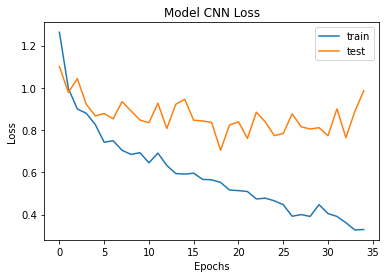

In [36]:
#yellow
plt.plot(CNN_Model.history["loss"])
#blue
plt.plot(CNN_Model.history["val_loss"])

plt.title('Model CNN Loss')
plt.legend(['train', 'test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

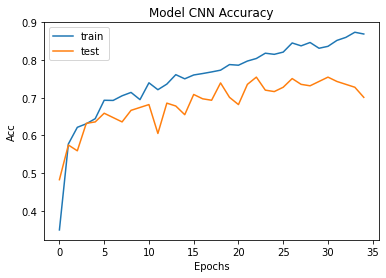

In [37]:
plt.plot(CNN_Model.history['accuracy'])
plt.plot(CNN_Model.history['val_accuracy'])
plt.title('Model CNN Accuracy')
plt.legend(['train', 'test'])
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

# RECURRENT CONVOLUTIONAL NEURAL NETWORK


In [23]:
model2 = Sequential()

model2.add(Conv2D(16,(3,3),
           activation="relu",
           input_shape=(200,200,3)))

model2.add(BatchNormalization())

model2.add(MaxPooling2D((2,2)))

###
model2.add(Conv2D(32,(3,3),
           activation="relu",
           padding="same"))

model2.add(BatchNormalization())

model2.add(MaxPooling2D((2,2)))

###
model2.add(Conv2D(64,(3,3),
           activation="relu",
           padding="same"))

model2.add(BatchNormalization())

model2.add(MaxPooling2D((2,2)))

###
model2.add(Conv2D(128,(2,2),
                 activation="relu",padding="same"))

model2.add(BatchNormalization())

model2.add(MaxPooling2D((2,2)))

###
model2.add(TimeDistributed(Flatten()))

model2.add(Bidirectional(LSTM(32,
                              return_sequences=True,
                              dropout=0.5,
                              recurrent_dropout=0.5)))

###
model2.add(Flatten())
model2.add(Dense(512,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(4,activation="softmax"))

In [24]:
model2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [25]:
RNN_Model = model2.fit(train_set,
                      validation_data=validation_set,
                      epochs=35)

Epoch 1/35
74/74 [==============================] - 61s 758ms/step - loss: 1.2346 - accuracy: 0.4174 - val_loss: 2.0182 - val_accuracy: 0.2261
Epoch 2/35
74/74 [==============================] - 55s 741ms/step - loss: 0.9373 - accuracy: 0.5915 - val_loss: 2.3123 - val_accuracy: 0.2375
Epoch 3/35
74/74 [==============================] - 55s 737ms/step - loss: 0.9085 - accuracy: 0.6115 - val_loss: 1.7953 - val_accuracy: 0.2720
Epoch 4/35
74/74 [==============================] - 59s 788ms/step - loss: 0.8138 - accuracy: 0.6676 - val_loss: 1.2186 - val_accuracy: 0.4713
Epoch 5/35
74/74 [==============================] - 61s 826ms/step - loss: 0.7936 - accuracy: 0.6644 - val_loss: 1.2195 - val_accuracy: 0.4674
Epoch 6/35
74/74 [==============================] - 58s 781ms/step - loss: 0.7309 - accuracy: 0.6931 - val_loss: 1.1110 - val_accuracy: 0.5632
Epoch 7/35
74/74 [==============================] - 60s 811ms/step - loss: 0.7163 - accuracy: 0.7121 - val_loss: 1.0797 - val_accuracy: 0.6092

In [31]:
e2 = model2.evaluate(test_set,verbose=False)
print("loss:  " + "%.4f" % e2[0])
print("accuracy:  " + "%.2f" % e2[1])

loss:  0.6255
accuracy:  0.78


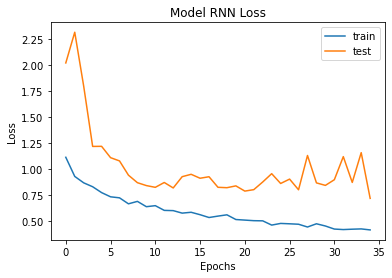

In [34]:
plt.plot(RNN_Model.history["loss"])
plt.plot(RNN_Model.history["val_loss"])
plt.title('Model RNN Loss')
plt.legend(['train', 'test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

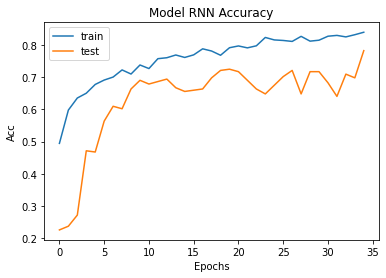

In [35]:
plt.plot(RNN_Model.history['accuracy'])
plt.plot(RNN_Model.history['val_accuracy'])
plt.title('Model RNN Accuracy')
plt.legend(['train', 'test'])
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()